<a href="https://colab.research.google.com/github/Avery1493/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Quinn_231_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [0]:
#Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [0]:
#Loading Data
Q3 = pd.read_csv('https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q3_Paid_or_Charged_Off')
Q4 = pd.read_csv('https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q4_Paid_or_Charged_Off')

Q3.shape, Q4.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((8409, 150), (3075, 150))

In [0]:
#Combining Data Sets
df = pd.concat([Q3,Q4])
print(df.shape)
df.sample(5)

(11484, 150)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
4986,156132939,NaN,2500,2500,2500.0,36 months,13.08%,84.34,B,B5,Teacher,10+ years,MORTGAGE,50000.0,Not Verified,Jul-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,335xx,FL,14.69,0,Oct-2000,780,784,1,NaN,NaN,7,0,1121,9.3%,17,w,0.0,0.0,2636.964666,2636.96,2500.0,136.96,0.0,0.0,0.0,Dec-2019,2301.42,NaN,Jan-2020,744,740,0,NaN,1,Individual,NaN,NaN,NaN,0,0,159499,1,2,3,4,2.0,25689,95.0,0,0,0,69.0,12100,4,3,4,6,22786.0,NaN,NaN,0,0,62.0,225,28,2,5,NaN,NaN,2.0,NaN,0,0,1,0,0,6,4,6,1,7,0.0,0,0,3,100.0,NaN,0,0,176062,26810,0,26962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1218,158549707,NaN,1000,1000,1000.0,36 months,20.55%,37.45,D,D2,Managing Editor,10+ years,MORTGAGE,66000.0,Not Verified,Sep-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,274xx,NC,21.29,0,Aug-1999,705,709,1,NaN,NaN,5,0,2444,97.8%,29,w,0.0,0.0,1000.001667,1000.00,1000.0,0.00,0.0,0.0,0.0,Sep-2019,1001.14,NaN,Dec-2019,709,705,0,NaN,1,Individual,NaN,NaN,NaN,0,0,114180,2,2,3,7,3.0,41053,85.0,0,0,1465,86.0,2500,2,0,3,7,22836.0,35.0,97.7,0,0,130.0,241,69,3,3,69.0,NaN,6.0,NaN,0,1,2,1,1,22,2,4,2,5,0.0,0,0,3,100.0,100.0,0,0,128019,43497,1500,48119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2250,160402539,NaN,16050,16050,16050.0,36 months,7.02%,495.73,A,A2,Maintenance Engineer,10+ years,MORTGAGE,68369.0,Not Verified,Oct-2019,Fully Paid,n,https:

# Target

In [0]:
#Binary Classification
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [0]:
#Classes are imbalanced
#balanced_accuracy_score would be best evaluation metric
#--returns the ave recall from each class
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.962818
Charged Off    0.037182
Name: loan_status, dtype: float64

# Cleaning and Exploration

In [0]:
df['issue_d'].unique()

array(['Sep-2019', 'Aug-2019', 'Jul-2019', 'Dec-2019', 'Nov-2019',
       'Oct-2019'], dtype=object)

In [0]:
df['out_prncp'].value_counts()

0.0    11484
Name: out_prncp, dtype: int64

In [0]:
df['out_prncp_inv'].value_counts()

0.0    11484
Name: out_prncp_inv, dtype: int64

In [0]:
df.isnull().sum()

id                                                0
member_id                                     11484
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      1346
emp_length                                      941
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
desc        

In [0]:
df['hardship_flag'].value_counts()

N    11484
Name: hardship_flag, dtype: int64

In [0]:
df['debt_settlement_flag'].value_counts()

N    11480
Y        4
Name: debt_settlement_flag, dtype: int64

In [0]:
df['settlement_date'].value_counts()

Dec-2019    2
Feb-2020    1
Jan-2020    1
Name: settlement_date, dtype: int64

In [0]:
#Stripping
df['term'] = df['term'].str.strip(' months')
df['int_rate'] = df['int_rate'].str.strip('%')
df['revol_util'] = df['revol_util'].str.strip('%')

#Combining 
df['FICO'] = df[['fico_range_low','fico_range_high']].mean(axis=1)

#Dropping
df = df.drop(['member_id','url','desc','zip_code', 'fico_range_low',
              'fico_range_high','hardship_flag','hardship_type',
              'hardship_reason','hardship_status','deferral_term',
              'hardship_amount','hardship_start_date','hardship_end_date',
              'payment_plan_start_date','hardship_length','hardship_dpd',
              'hardship_loan_status','next_pymnt_d',
              'orig_projected_additional_accrued_interest',
              'hardship_payoff_balance_amount',
              'hardship_last_payment_amount'], axis = 1)

#Missing
df = df.fillna('Missing')
#Datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


In [0]:
print(df.shape)
df.sample(5)

(11484, 129)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,FICO
6867,153685313,2900,2900,2900.0,36,17.97,104.80,D,D1,Line worker,10+ years,OWN,60000.0,Not Verified,2019-07-01,Fully Paid,n,other,Other,KY,18.56,1,2010-06-01,0,16,Missing,15,0,7197,21.5,38,w,0.0,0.0,2920.266500,2920.27,2900.0,20.27,0.0,0.0,0.0,Jul-2019,2926.06,Jun-2019,714,710,0,Missing,1,Individual,Missing,Missing,Missing,0,0,24723,0,1,0,1,18,17526,54,1,4,0,38,33400,1,4,1,5,1766,3800,0,0,0,93,108,12,12,0,24,Missing,12,16,0,0,6,3,6,13,14,25,6,15,0,0,0,1,100.0,0,0,0,65971,24723,3800,32571,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,N,Missing,Missing,Missing,Missing,Missing,Missing,712.0
1642,158189871,1500,1500,1500.0,36,10.33,48.64,B,B1,Systems Analyst,10+ years,MORTGAGE,109000.0,Source Verified,2019-09-01,Fully Paid,n,credit_card,Credit card refinancing,WA,27.12,0,2004-05-01,1,Missing,Missing,9,0,22054,100.2,34,w,0.0,0.0,1528.594908,1528.59,1500.0,28.59,0.0,0.0,0.0,Nov-2019,20.81,Feb-2020,734,730,0,Missing,1,Individual,Missing,Missing,Missing,0,0,443582,1,6,2,3,2,133535,80,0,0,21079,84,22000,0,1,1,3,49287,0,100.4,0,0,174,184,40,2,4,184,Missing,4,Missing,0,1,2,1,7,20,2,10,2,9,0,0,0,2,100.0,100,0,0,492501,155589,21000,158541,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,N,Missing,Missing,Missing,Missing,Missing,Missing,722.0
1718,157983356,2400,2400,2400.0,36,20.55,89.87,D,D2,Manager,4 years,OWN,69996.0,Verified,2019-09-01,Fully Paid,n,vacation,Vacation,VT,13.12,0,2002-02-01,1,28,Missing,13,0,8347,67.3,19,w,0.0,0.0,2594.263883,2594.26,2400.0,194.26,0.0,0.0,0.0,Feb-2020,2237.52,Jan-2020,679,675,0,28,1,Individual,Missing,Missing,Missing,0,265,130544,2,2,1,2,5,9028,75,2,2,2922,71,12400,1,4,2,4,10042,1122,88.1,0,0,164,210,3,3,2,8,28,5,28,1,5,6,6,6,6,9,11,6,13,0,0,0,3,73.7,83.3,0,0,183350,17375,9400,12000,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,N,Missing,Missing,

In [0]:
df['issue_d'].describe()

count                   11484
unique                      6
top       2019-07-01 00:00:00
freq                     3710
first     2019-07-01 00:00:00
last      2019-12-01 00:00:00
Name: issue_d, dtype: object

In [0]:
train = df[df['issue_d'].dt.month <= 8]
val = df[(df['issue_d'].dt.month >8) & (df['issue_d'].dt.month <11)]
test = df[df['issue_d'].dt.month >= 11]

train.shape, val.shape, test.shape

((6450, 129), (3485, 129), (1549, 129))

In [0]:
train['loan_status'].value_counts(normalize=True)

Fully Paid     0.946357
Charged Off    0.053643
Name: loan_status, dtype: float64

In [0]:
val['loan_status'].value_counts(normalize=True)

Fully Paid     0.979053
Charged Off    0.020947
Name: loan_status, dtype: float64

In [0]:
test['loan_status'].value_counts(normalize=True)

Fully Paid     0.994835
Charged Off    0.005165
Name: loan_status, dtype: float64

In [0]:
target = 'loan_status'
features = train.columns.drop([target, 'issue_d','earliest_cr_line'])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [0]:
!pip install category_encoders
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=5)
)

pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['term', 'int_rate', 'grade', 'sub_grade',
                                      'emp_title', 'emp_length',
                                      'home_ownership', 'verification_status',
                                      'pymnt_plan', 'purpose', 'title',
                                      'addr_state', 'dti',
                                      'mths_since_last_delinq',
                                      'mths_since_last_record', 'revol_util',
                                      'initial_list_status', 'last_pymnt_d',
                                      'last_credit_pull_d',
                                      'mths_sinc...
                                return_df=True, verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=5,
        

In [0]:
y_pred = pipeline.predict(X_val)

In [0]:
print('Validation Balanced Accuracy Score',pipeline.score(X_val, y_val))

Validation Balanced Accuracy Score 0.9977044476327116


In [0]:
balanced_accuracy_score(y_val,y_pred)

0.9787193467054232

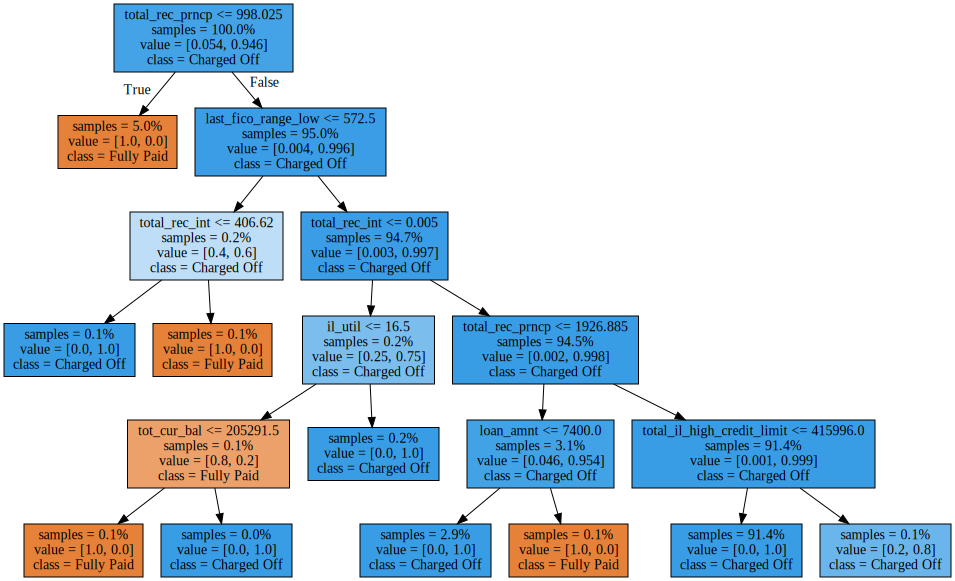

In [0]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file = None,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False, 
    proportion=True
)

graphviz.Source(dot_data)